**Basic RNN structure**

In [2]:
#Importing libraries
from keras.layers import SimpleRNN
from keras import Sequential
from keras.layers import Embedding

In [1]:
from tensorflow.keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
max_features = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
maxlen = 500
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

**Building Architecture**

In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss = 'binary_crossentropy', metrics = ['acc'])

In [10]:
history = model.fit(input_train, y_train, epochs = 5, batch_size = 128, validation_split = 0.2)

Epoch 1/5
157/157 [==============================] - 123s 783ms/step - loss: 1.0294 - acc: 0.0226 - val_loss: 1.4598 - val_acc: 0.0044
Epoch 2/5
157/157 [==============================] - 110s 702ms/step - loss: 0.9130 - acc: 0.0080 - val_loss: 1.3486 - val_acc: 0.0172
Epoch 3/5
157/157 [==============================] - 121s 767ms/step - loss: 0.8556 - acc: 0.0082 - val_loss: 1.4800 - val_acc: 0.0112
Epoch 4/5
157/157 [==============================] - 105s 665ms/step - loss: 0.5756 - acc: 0.0032 - val_loss: 2.7864 - val_acc: 0.0116
Epoch 5/5
157/157 [==============================] - 115s 734ms/step - loss: 0.5520 - acc: 8.0000e-04 - val_loss: 1.5579 - val_acc: 0.0050


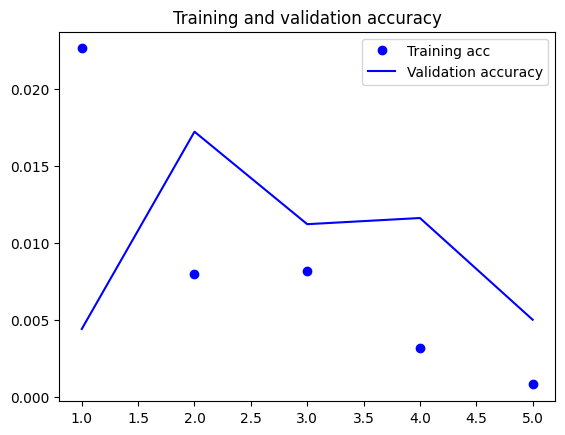

In [14]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['acc'], 'bo', label = 'Training acc')
plt.plot(epochs, history.history['val_acc'], 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()